In [ ]:
import sys
print("\n".join(sys.path))

In [ ]:

import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

print("\n".join(sys.path))


In [ ]:
from modeling_dandelin import VQADandelin

vqa_model = VQADandelin()

vqa_label, vqa_prob = vqa_model.detect_phone("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged/0_1.jpg", query="Is the person using a cell phone?")

In [ ]:
import torch
from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image

device = "cpu"
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa").to("cpu")
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [66]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image


processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [110]:
import torch
# image = Image.open("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged/0_19.jpg")
# text = "How many cell phone are there?"
# text = "is the person using a cell phone?"
# text = "Does the person have a cell phone?"
# text = "Is there a cell phone in this image?"
# text = "Is a mobile phone visible there?"
# text = "Is a mobile phone visible in the image?"
# text = "Is a mobile phone visible in the picture?"
# text = "Is a mobile phone present in the image?"
text = "Is a cell phone present in the image?"

# images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

# images = [os.path.join("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged") if filename.startswith("0_")]


# images = [os.path.join("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332") if filename.startswith("0_")]


images = [os.path.join("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged") if filename.startswith("0_")]


vqa_results = []
for image in images:
    fram_path = image
    image = Image.open(image)
    encoding = processor(image, text, return_tensors="pt")

    with torch.inference_mode():
        outputs = model(**encoding)
    logits = outputs.logits
    idx = logits.argmax(-1).item()
    # print("Predicted answer:", model.config.id2label[idx])
    probs = torch.softmax(logits, dim=-1)
    max_prob, _ = torch.max(probs, dim=-1)
    # print(max_prob.item())

    vqa_results.append((fram_path, model.config.id2label[idx], max_prob.item()))

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [76]:
vqa_results = sorted(vqa_results, key=lambda x: int(os.path.splitext(os.path.basename(x[0]))[0].split('_')[1]))
for result in vqa_results:
    print(result)

('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_1.jpg', 'no', 0.9999908208847046)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_2.jpg', 'no', 0.9999892711639404)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_3.jpg', 'no', 0.9999884366989136)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_4.jpg', 'no', 0.99998939037323)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_5.jpg', 'no', 0.9999922513961792)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_6.jpg', 'no', 0.9999872446060181)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_7.jpg', 'no', 0.9999880790710449)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_8.jpg', 'no', 0.9999884366989136)
('/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_9.jpg', 'no', 0.999985933303833)
('/tmp/video_incidents

In [ ]:
dtype = next(model.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model.parameters()) )
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

In [106]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor_blip = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model_blip = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [148]:
# images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

# images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

# images = [os.path.join("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged") if filename.startswith("0_")]


images = [os.path.join("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332") if filename.startswith("0_")]


# images = [os.path.join("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged") if filename.startswith("0_")]


# images = images[:5]
blip_results = []
for image in images:
    fram_path = image
    raw_image = Image.open(image).convert('RGB')

    # question = "Is a cell phone clearly visible in the picture?"
    # question = "Is the person in the picture using a cell phone?"
    # question = "Is there a visible cell phone being used by the person in the image?"
    # question = "Is there a cell phone clearly visible and being used by the person in the image?"
    # question = "Is there a cell phone clearly present and being used by the person in the image?"
    # question = "Is there a cell phone clearly visible in the image where a person is present?"
    # question = "Is there a cell phone clearly visible in the image and a person is present?"
    # question = "Is there a cell phone visible in the image, with a person present?"
    # question = "Is there a cell phone visible in the image, with a person present?"
    # question = "Is there a cell phone clearly present in the picture?"
    # question = "Is there a cell phone present in the picture, and is it being held by a person?"
    # question = "Is there a cell phone held by a person in the picture?"
    # question = "Is the person in the picture holding a phone in their hand?"
    # question = "Is the person in the picture holding a cell phone in their hand?"
    # question = "Is a cell phone being held in hand by the person in the picture?"
    # question = "Is a cell phone in the person's hand?"
    question = "Is a cell phone clearly visible in the person's hand?"

    inputs = processor_blip(raw_image, question, return_tensors="pt")

    with torch.inference_mode():
        out = model_blip.generate(**inputs)
    real_output = processor_blip.decode(out[0], skip_special_tokens=True)
    # print(real_output)

    blip_results.append((fram_path, real_output))

In [149]:
blip_results = sorted(blip_results, key=lambda x: int(os.path.splitext(os.path.basename(x[0]))[0].split('_')[1]))

for result in blip_results:
    print(result)

('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_1.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_2.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_3.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_4.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_5.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_6.jpg', 'no')
('/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332/0_7.jpg', 'no')
('/tmp/video_inciden

In [ ]:
dtype = next(model_blip.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model_blip.parameters()) )
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

In [ ]:
from modeling_yolov8 import YOLOv8PersonDetector
import os
import cv2
from ultralytics import YOLO
import torch
import time

yolov8_persondetector = YOLOv8PersonDetector()

model_yolo = YOLO("yolov8n.pt").to("cpu")
classes_to_detect = [67]  # Class 0 for "person" in COCO dataset

In [ ]:
results = model_yolo.predict(["/home/ajeet/Downloads/cropped_phone.jpg"], conf=0.0, 
                             device="cpu", imgsz=320, classes=classes_to_detect, 
                        save=True, save_txt=True, show_labels=True, show_conf=True, show_boxes=True,iou=0.40)

In [ ]:
print(next(model_yolo.parameters()).dtype)

total_params = (sum(p.numel() for p in model_yolo.parameters())) 
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * 32 / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb :.2f} MB")

In [ ]:
dtype = next(model_blip.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model_blip.parameters()) )
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

In [ ]:
from transformers import BlipForQuestionAnswering, BlipProcessor, AutoModelForQuestionAnswering
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # or use load_in_8bit for 8-bit quantization
    # bnb_4bit_compute_dtype=torch.float16,  # Compute in FP164
    # bnb_4bit_use_double_quant=True,  # Double quantization for improved accuracy
    # bnb_4bit_quant_type="nf4"  # Use NormalFloat4 quantization
)

# Load the model with the quantization configuration
model_name = "Salesforce/blip-vqa-base"
model_quantization = BlipForQuestionAnswering.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    device_map="cpu"
)

processor_quantization = BlipProcessor.from_pretrained(model_name)

In [ ]:
dtype = next(model_blip.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model_blip.parameters()) )
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

In [24]:
# Ultralytics YOLO 🚀, AGPL-3.0 license

import argparse

import cv2
import numpy as np
import onnxruntime as ort
import torch
import os

from ultralytics.utils import ASSETS, yaml_load
from ultralytics.utils.checks import check_requirements, check_yaml


class YOLOv8:
    """YOLOv8 object detection model class for handling inference and visualization."""

    def __init__(self, onnx_model, input_image, confidence_thres, iou_thres):
        """
        Initializes an instance of the YOLOv8 class.

        Args:
            onnx_model: Path to the ONNX model.
            input_image: Path to the input image.
            confidence_thres: Confidence threshold for filtering detections.
            iou_thres: IoU (Intersection over Union) threshold for non-maximum suppression.
        """
        self.onnx_model = onnx_model
        self.input_image = input_image
        self.confidence_thres = confidence_thres
        self.iou_thres = iou_thres

        # Load the class names from the COCO dataset
        self.classes = yaml_load(check_yaml("coco8.yaml"))["names"]

        # Generate a color palette for the classes
        self.color_palette = np.random.uniform(0, 255, size=(len(self.classes), 3))

    def draw_detections(self, img, box, score, class_id):
        """
        Draws bounding boxes and labels on the input image based on the detected objects.

        Args:
            img: The input image to draw detections on.
            box: Detected bounding box.
            score: Corresponding detection score.
            class_id: Class ID for the detected object.

        Returns:
            None
        """
        # Extract the coordinates of the bounding box
        x1, y1, w, h = box

        # Retrieve the color for the class ID
        color = self.color_palette[class_id]

        # Draw the bounding box on the image
        cv2.rectangle(img, (int(x1), int(y1)), (int(x1 + w), int(y1 + h)), color, 2)

        # Create the label text with class name and score
        label = f"{self.classes[class_id]}: {score:.2f}"

        # Calculate the dimensions of the label text
        (label_width, label_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        # Calculate the position of the label text
        label_x = x1
        label_y = y1 - 10 if y1 - 10 > label_height else y1 + 10

        # Draw a filled rectangle as the background for the label text
        cv2.rectangle(
            img, (label_x, label_y - label_height), (label_x + label_width, label_y + label_height), color, cv2.FILLED
        )

        # Draw the label text on the image
        cv2.putText(img, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    def preprocess(self):
        """
        Preprocesses the input image before performing inference.

        Returns:
            image_data: Preprocessed image data ready for inference.
        """
        # Read the input image using OpenCV
        self.img = cv2.imread(self.input_image)

        # Get the height and width of the input image
        self.img_height, self.img_width = self.img.shape[:2]

        # Convert the image color space from BGR to RGB
        img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)

        # Resize the image to match the input shape
        img = cv2.resize(img, (self.input_width, self.input_height))

        # Normalize the image data by dividing it by 255.0
        image_data = np.array(img) / 255.0

        # Transpose the image to have the channel dimension as the first dimension
        image_data = np.transpose(image_data, (2, 0, 1))  # Channel first

        # Expand the dimensions of the image data to match the expected input shape
        image_data = np.expand_dims(image_data, axis=0).astype(np.float32)

        # Return the preprocessed image data
        return image_data

    def postprocess(self, input_image, output):
        """
        Performs post-processing on the model's output to extract bounding boxes, scores, and class IDs.

        Args:
            input_image (numpy.ndarray): The input image.
            output (numpy.ndarray): The output of the model.

        Returns:
            numpy.ndarray: The input image with detections drawn on it.
        """
        # Transpose and squeeze the output to match the expected shape
        outputs = np.transpose(np.squeeze(output[0]))

        # Get the number of rows in the outputs array
        rows = outputs.shape[0]

        # Lists to store the bounding boxes, scores, and class IDs of the detections
        boxes = []
        scores = []
        class_ids = []
        phone_detected = False

        # Calculate the scaling factors for the bounding box coordinates
        x_factor = self.img_width / self.input_width
        y_factor = self.img_height / self.input_height

        # Iterate over each row in the outputs array
        for i in range(rows):
            # Extract the class scores from the current row
            classes_scores = outputs[i][4:]
            # print(classes_scores)

            # num_classes = len(classes_scores)
            # print(num_classes)

        # # Check if the phone class (assumed ID 67) is within the range of class IDs
        #     if 67 < num_classes:
        #         phone_score = classes_scores[67]
        #         if phone_score >= self.confidence_thres:
        #             phone_detected = True

        #             # Extract the bounding box coordinates from the current row
        #             x, y, w, h = outputs[i][0], outputs[i][1], outputs[i][2], outputs[i][3]

        #             # Calculate the scaled coordinates of the bounding box
        #             left = int((x - w / 2) * x_factor)
        #             top = int((y - h / 2) * y_factor)
        #             width = int(w * x_factor)
        #             height = int(h * y_factor)

        #             # Add the class ID (phone), score, and box coordinates to the respective lists
        #             class_ids.append(67)  # Phone class ID
        #             scores.append(phone_score)
        #         boxes.append([left, top, width, height])

            # Find the maximum score among the class scores
            max_score = np.amax(classes_scores)
            # print(max_score)

            # If the maximum score is above the confidence threshold
            if max_score >= self.confidence_thres:
                # Get the class ID with the highest score
                class_id = np.argmax(classes_scores)
                # print(f"class_id: {class_id}")

                if class_id == 2:
                    phone_detected = True
                    # Extract the bounding box coordinates from the current row
                    x, y, w, h = outputs[i][0], outputs[i][1], outputs[i][2], outputs[i][3]

                    # Calculate the scaled coordinates of the bounding box
                    left = int((x - w / 2) * x_factor)
                    top = int((y - h / 2) * y_factor)
                    width = int(w * x_factor)
                    height = int(h * y_factor)

                    # Add the class ID, score, and box coordinates to the respective lists
                    class_ids.append(class_id)
                    scores.append(max_score)
                    boxes.append([left, top, width, height])

        # Apply non-maximum suppression to filter out overlapping bounding boxes
        indices = cv2.dnn.NMSBoxes(boxes, scores, self.confidence_thres, self.iou_thres)

        # Iterate over the selected indices after non-maximum suppression
        for i in indices:
            # Get the box, score, and class ID corresponding to the index
            box = boxes[i]
            score = scores[i]
            class_id = class_ids[i]

            # Draw the detection on the input image
            self.draw_detections(input_image, box, score, class_id)

        # Return the modified input image
        return input_image , phone_detected

    def main(self):
        """
        Performs inference using an ONNX model and returns the output image with drawn detections.

        Returns:
            output_img: The output image with drawn detections.
        """
        # Create an inference session using the ONNX model and specify execution providers
        session = ort.InferenceSession(self.onnx_model, providers=["CUDAExecutionProvider", "CPUExecutionProvider"])

        # Get the model inputs
        model_inputs = session.get_inputs()

        # Store the shape of the input for later use
        input_shape = model_inputs[0].shape
        self.input_width = input_shape[2]
        self.input_height = input_shape[3]

        # Preprocess the image data
        img_data = self.preprocess()

        # Run inference using the preprocessed image data
        outputs = session.run(None, {model_inputs[0].name: img_data})

        # Perform post-processing on the outputs to obtain output image.
        return self.postprocess(self.img, outputs) # output image

def save_image(image, path, image_name):
    if not os.path.exists(path):
        os.makedirs(path)
    cv2.imwrite(os.path.join(path, image_name), image)

if __name__ == "__main__":
    # Create an argument parser to handle command-line arguments
    # parser = argparse.ArgumentParser()
    # parser.add_argument("--model", type=str, default="yolov8n.onnx", help="Input your ONNX model.")
    # parser.add_argument("--img", type=str, default=str(ASSETS / "bus.jpg"), help="Path to input image.")
    # parser.add_argument("--conf-thres", type=float, default=0.5, help="Confidence threshold")
    # parser.add_argument("--iou-thres", type=float, default=0.5, help="NMS IoU threshold")
    # args = parser.parse_args()

    # Check the requirements and select the appropriate backend (CPU or GPU)
    # check_requirements("onnxruntime-gpu" if torch.cuda.is_available() else "onnxruntime")

    # Create an instance of the YOLOv8 class with the specified arguments
    # detection = YOLOv8(args.model, args.img, args.conf_thres, args.iou_thres)
    # images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
    # for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]


    # images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
    # for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

    images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
    for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

    # images = [os.path.join("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged" , filename) 
    # for filename in os.listdir("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged") if filename.startswith("0_")]


    # images = [os.path.join("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332" , filename) 
    # for filename in os.listdir("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332") if filename.startswith("0_")]


    # images = [os.path.join("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged" , filename) 
    # for filename in os.listdir("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged") if filename.startswith("0_")]


    # images = images[:1]

    images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

    # images = [os.path.join("/home/ajeet/codework/Cellphone_train/train" , filename) 
    # for filename in os.listdir("/home/ajeet/codework/Cellphone_train/train")]
    # images = images[:1000]

    for image in images:
        detection = YOLOv8("/home/ajeet/Downloads/od_v8_nano_feb24_2.onnx",image, 0.001, 0.40)

        # Perform object detection and obtain the output image
        output_image, phone_detected = detection.main()
        
        if phone_detected:
            print(f"{image}: phone_detected ")
        else:
            print(f"{image}: phone_not_detected ")



        save_path_with_phone = "/home/ajeet/codework/finetuned_yolo"
        image_name = os.path.basename(detection.input_image)
        save_image(output_image, save_path_with_phone, image_name)

        # Display the output image in a window
        # cv2.namedWindow("Output", cv2.WINDOW_NORMAL)
        # cv2.imshow("Output", output_image)

        # # Wait for a key press to exit
        # cv2.waitKey(10000)
        # cv2.destroyAllWindows()

/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_1.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_2.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_3.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_4.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_5.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_6.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_7.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_8.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_9.jpg: phone_not_detected 
/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_10.jpg: phone_not_detected 

In [4]:
import onnxruntime as ort

# Load the ONNX model
onnx_model_path = "/home/ajeet/Downloads/od_v8_nano_feb24_2.onnx"
session = ort.InferenceSession(onnx_model_path, providers=["CUDAExecutionProvider", "CPUExecutionProvider"])

# Get the model inputs
model_inputs = session.get_inputs()
for i, input in enumerate(model_inputs):
    print(f"Input {i}:")
    print(f"  Name: {input.name}")
    print(f"  Shape: {input.shape}")
    # print(f"  Type: {input.dtype}")

# Get the model outputs
model_outputs = session.get_outputs()
for i, output in enumerate(model_outputs):
    print(f"Output {i}:")
    print(f"  Name: {output.name}")
    print(f"  Shape: {output.shape}")
    # print(f"  Type: {output.dtype}")

Input 0:
  Name: images
  Shape: [1, 3, 640, 640]
Output 0:
  Name: output0
  Shape: [1, 8, 8400]


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [ ]:
from modeling_clip import CLIP
import time

clip_model = CLIP(device="cpu")

text_prompts = {
"phone": [
    "a photo of a person using a cell phone."

],
"no_phone": [
    "a photo of a person not using a cell phone."
]
}

images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

# images = images[:10]

images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

start_time = time.time()
_, image_embeddings = clip_model.get_image_embeddings(images)
time_taken_by_embeddings = time.time() - start_time
print(f"Time taken to extract embeddings: {time_taken_by_embeddings:.2f} seconds")

precomputed_embeddings = clip_model.precompute_prompt_embeddings(text_prompts)

In [ ]:
clip_results = []
for frame_path, image_embedding in zip(images, image_embeddings):
    clip_label, clip_prob = clip_model.classify_image(image_embedding, precomputed_embeddings)
    clip_prob = 1
    clip_results.append((frame_path, clip_label, clip_prob))  # Store frame path, label, and probability

for result in clip_results:
    print(result)

In [ ]:
import numpy as np

def cosine_similarity_to_probability(cosine_similarity, k=5, b=0):
    # Apply the sigmoid function
    probability = 1 / (1 + np.exp(-k * (cosine_similarity - b)))
    return probability

# Example usage
cosine_similarity = 0.25  # Example cosine similarity value
probability = cosine_similarity_to_probability(cosine_similarity)
print(f"Probability: {probability}")


In [1]:
from PIL import Image
import requests
import torch
from transformers import CLIPProcessor, CLIPModel
import os

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-16 18:42:48.064939: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 18:42:48.100295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 18:42:48.779930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
frame_path = "/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged/0_142.jpg"
image = Image.open(frame_path)
list_of_classes = ["a person", "a cell phone"]
inputs = processor(text=list_of_classes, images=image, return_tensors="pt", padding=True)

with torch.inference_mode():
    outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

# # print(probs)
# max_prob_index = int(torch.argmax(probs))
# # print(list_of_classes[max_prob_index])


logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # label probabilities
max_prob_index = int(torch.argmax(probs))

print((frame_path, list_of_classes[max_prob_index], probs))

('/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged/0_142.jpg', 'a cell phone', tensor([[0.4953, 0.5047]]))


In [103]:
# images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

# images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

images = [os.path.join("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged") if filename.startswith("0_")]


# images = [os.path.join("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332") if filename.startswith("0_")]


# images = [os.path.join("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9aa3bbb8-9cc2-48a9-a2a6-aa9c86acf71b_20240911182617744144_20240911182619026111_0_merged") if filename.startswith("0_")]


# images = images[:10]

images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

# Define the list of classes 
# list_of_classes = ['human', "phone"]
list_of_classes = ["person", "cell phone"]
clip_prob_list = []
for image in images:
    frame_path = image
    image = Image.open(image)

    inputs = processor(text=list_of_classes, images=image, return_tensors="pt", padding=True)

    with torch.inference_mode():
        outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

    # print(probs)
    max_prob_index = int(torch.argmax(probs))
    # print(list_of_classes[max_prob_index])

    clip_prob_list.append((frame_path, list_of_classes[max_prob_index], probs))

In [104]:
for result in clip_prob_list:
    print(result)
    # my_tensor = result[2]
    # if my_tensor[0][1] > 0.90:
    #     print(result)

('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_1.jpg', 'person', tensor([[0.8162, 0.1838]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_2.jpg', 'person', tensor([[0.7666, 0.2334]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_3.jpg', 'person', tensor([[0.7783, 0.2217]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_4.jpg', 'person', tensor([[0.7406, 0.2594]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_5.jpg', 'person', tensor([[0.8481, 0.1519]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_6.jpg', 'person', tensor([[0.8833, 0.1167]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_7.jpg', 'person', tensor([[0.8572, 0.1428]]))
('/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_8.jpg', 'person', tensor([[0.8464, 0.1536]]))
('/tmp/video_incidents_ajeet/b20

In [8]:
images = [os.path.join("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged") if filename.startswith("0_")]

# images = images[:10]

images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

In [9]:
images

['/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_1.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_2.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_3.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_4.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_5.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_6.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_7.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_8.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_9.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_10.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_11.jpg',
 '/tmp/video_incidents_ajeet/b2045fbc-5af3-4b40-a166-072b90f803e5_merged/0_12.jpg',
 

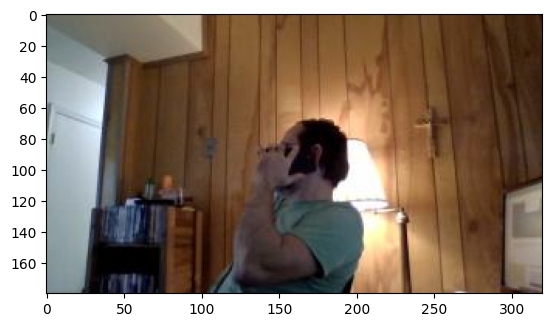

In [31]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/home/ajeet/codework/Cellphone_train/train/27591.jpg")

plt.imshow(img)

In [36]:
import json
import re

def read_log_entries(file_path):
    log_entries = []
    with open(file_path, 'r') as file:
        for line in file:
            line = re.sub(r"tensor\(\[\[(.*?)\]\]\)", r'"\1"', line)  
            print(line)
            line = line.replace("'", '"') 
            
            try:
                log_entry = json.loads(line.strip())
                log_entries.append(log_entry)
            except json.JSONDecodeError as e:
                print(f"Error decoding line: {line.strip()}\nError: {e}")
    return log_entries

file_path = '/home/ajeet/codework/ujjawal_github/visionwork/models/clip/phone/18k_logs_yolo+clip'
log_entries = read_log_entries(file_path)

# for entry in log_entries:
#     print(entry)
#     break

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/25499.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.8100158, 'clip_prob': -1}

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/23416.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.9091164, 'clip_prob': -1}

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/100445_2020-07-23_10850__mob_poison.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.80900854, 'clip_prob': -1}

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/25857_mob_poison.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.8041759, 'clip_prob': -1}

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/24578_mob_poison.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.65990925, 'clip_prob': -1}

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/97553_2020-07-21_3647__mob_jitter.jpg', 'final_label': 'a cell phone', 'yolo_phone_score': 0.9187473, 'clip_prob': -1}

{'frame_path

In [37]:
len(log_entries)

18090

In [38]:
log_entries[0]

{'frame_path': '/home/ajeet/codework/Cellphone_train/train/25499.jpg',
 'final_label': 'a cell phone',
 'yolo_phone_score': 0.8100158,
 'clip_prob': -1}

In [105]:
count = 0
print(len(image_paths))
for i, (image_path, clip_prob, yolo_phone_score) in enumerate(image_paths):
    # print(type(yolo_phone_score))
    if yolo_phone_score < 0.40:
        count = count + 1
    # break

print(count)

996
996


In [ ]:
image_paths

In [88]:
import math

def plot_images_grid(image_paths, images_per_row=20, save_path="/temp"):
    num_images = len(image_paths)
    num_rows = math.ceil(num_images / images_per_row)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 3, num_rows * 3))
    axes = axes.flatten()

    for i, (image_path, clip_prob, yolo_phone_score) in enumerate(image_paths):
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image_rgb)
        axes[i].axis('off')
        base_name = os.path.basename(image_path)
        # axes[i].set_title(f"{base_name}")
        axes[i].set_title(f"{yolo_phone_score:.2f} :: {clip_prob}")

    for i in range(len(image_paths), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

image_paths = [(result['frame_path'], result['clip_prob'], result['yolo_phone_score']) for result in log_entries if result['final_label'] == "no_cell_phone" and result['yolo_phone_score'] != -1]

In [17]:
# print(len(image_paths))
# plot_images_grid(image_paths[:200], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_0_200.jpg")

In [15]:
# plot_images_grid(image_paths[200:400], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_200_400.jpg")

In [16]:
# plot_images_grid(image_paths[400:600], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_400_600.jpg")

In [14]:
# plot_images_grid(image_paths[600:800], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_600_800.jpg")

In [ ]:
plot_images_grid(image_paths[800:1000], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_800_1000.jpg")

In [ ]:
plot_images_grid(image_paths[1000:], images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_1000_1200.jpg")

In [1]:
# left_by_yolo = [result['frame_path'] for result in log_entries if result['yolo_phone_score'] == -1]
# len(left_by_yolo)

# plot_images_grid(left_by_yolo, images_per_row=10, save_path="/home/ajeet/codework/phone_testing/output_left_by_yolo.jpg")

In [108]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests


# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

remote
Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
remote
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
couch
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
cat
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
cat
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


In [112]:
image = Image.open("/home/ajeet/codework/finetuned_yolo/0_94.jpg")


inputs = processor(images=image, return_tensors="pt")
with torch.inference_mode():
    outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(model.config.id2label[label.item()])
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


person
Detected person with confidence 1.0 at location [45.67, 59.06, 562.04, 356.99]
cell phone
Detected cell phone with confidence 0.997 at location [343.26, 20.44, 513.52, 356.48]


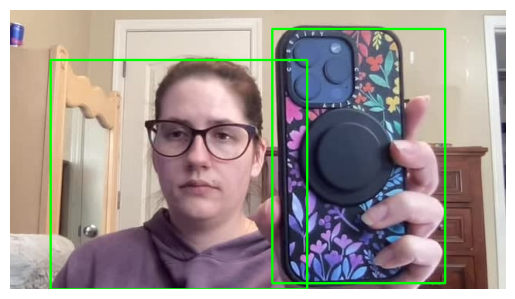

In [3]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load an image and preprocess it
image_path = '/home/ajeet/codework/finetuned_yolo/0_94.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = F.to_tensor(image_rgb)

# Add batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Perform object detection
with torch.no_grad():
    outputs = model(image_tensor)

# Post-process the results
scores = outputs[0]['scores'].numpy()
boxes = outputs[0]['boxes'].numpy()
labels = outputs[0]['labels'].numpy()

# Filter boxes with a confidence score above a threshold (e.g., 0.5)
threshold = 0.5
indices = scores > threshold
boxes = boxes[indices]
labels = labels[indices]

# Draw bounding boxes on the image
for box in boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [4]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt
import os
import time

# Load a pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

images = [os.path.join("/home/ajeet/codework/datasets/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
for filename in os.listdir("/home/ajeet/codework/datasets/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

# Load an image and preprocess it
for image in images:
    start_time = time.time()
    # Load an image and preprocess it
    image_path = image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image_rgb)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        outputs = model(image_tensor)

    # Post-process the results
    scores = outputs[0]['scores'].numpy()
    boxes = outputs[0]['boxes'].numpy()
    labels = outputs[0]['labels'].numpy()

    # COCO class ID for "cell phone"
    PHONE_CLASS_ID = 77

    # Filter boxes for the "cell phone" class with a confidence score above a threshold (e.g., 0.5)
    threshold = 0.5
    phone_indices = (labels == PHONE_CLASS_ID) & (scores > threshold)
    phone_boxes = boxes[phone_indices]
    phone_scores = scores[phone_indices]
    print(phone_scores)

    end_time = time.time() - start_time
    print(end_time)
    # Draw bounding boxes on the image
    # for box, score in zip(phone_boxes, phone_scores):
    #     x1, y1, x2, y2 = box
    #     cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    #     cv2.putText(image_rgb, f'Phone: {score:.2f}', (int(x1), int(y1) - 10), 
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # # Display the image
    # plt.imshow(image_rgb)
    # plt.axis('off')
    # plt.show()

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[]
2.6038172245025635
[]
2.7774834632873535


KeyboardInterrupt: 

In [5]:
import torch
import torchvision

# Load a pre-trained RetinaNet model
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

# Save the model to a file
torch.save(model.state_dict(), 'retinanet.pth')

# Check the file size
import os
file_size = os.path.getsize('retinanet.pth') / (1024 * 1024)  # Convert bytes to MB
print(f'Model size: {file_size:.2f} MB')

Model size: 130.26 MB


In [10]:
total_params = sum(p.numel() for p in model.parameters())
param_size = 4  # Each parameter typically takes 4 bytes (float32)

print(total_params /100000)
# Calculate the total size in bytes and convert to MB
total_size = total_params * param_size / (1024 * 1024)  # Convert bytes to MB
print(f'Model size in memory: {total_size:.2f} MB')

340.14999
Model size in memory: 129.76 MB


In [10]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained SSD model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()  # Set the model to evaluation mode


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /home/ajeet/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:04<00:00, 32.5MB/s] 


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [11]:
total_params = sum(p.numel() for p in model.parameters())
param_size = 4  # Each parameter typically takes 4 bytes (float32)

# Calculate the total size in bytes and convert to MB
total_size = total_params * param_size / (1024 * 1024)  # Convert bytes to MB
print(f'Model size in memory: {total_size:.2f} MB')

Model size in memory: 135.96 MB


In [39]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained SSD model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()  # Set the model to evaluation mode


images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

# Load an image and preprocess it
for image in images:
    image_path = image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image_rgb)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        outputs = model(image_tensor)

    # Post-process the results
    scores = outputs[0]['scores'].numpy()
    boxes = outputs[0]['boxes'].numpy()
    labels = outputs[0]['labels'].numpy()

    # COCO class ID for "cell phone"
    PHONE_CLASS_ID = 77

    # Filter boxes for the "cell phone" class with a confidence score above a threshold (e.g., 0.5)
    threshold = 0.1
    phone_indices = (labels == PHONE_CLASS_ID) & (scores > threshold)
    # print(phone_indices)
    phone_boxes = boxes[phone_indices]
    phone_scores = scores[phone_indices]
    print(phone_scores)
    break

    # Draw bounding boxes on the image
    for box, score in zip(phone_boxes, phone_scores):
        x1, y1, x2, y2 = box
        cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image_rgb, f'Phone: {score:.2f}', (int(x1), int(y1) - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # # Display the image
    # plt.imshow(image_rgb)
    # plt.axis('off')
    # plt.show()


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[]


In [40]:
total_params = sum(p.numel() for p in model.parameters())
param_size = 4  # Each parameter typically takes 4 bytes (float32)

# Calculate the total size in bytes and convert to MB
total_size = total_params * param_size / (1024 * 1024)  # Convert bytes to MB
print(f'Model size in memory: {total_size:.2f} MB')

Model size in memory: 135.96 MB


In [32]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained SSDLite model
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()  # Set the model to evaluation mode

total_params = sum(p.numel() for p in model.parameters())
param_size = 4  # Each parameter typically takes 4 bytes (float32)

# Calculate the total size in bytes and convert to MB
total_size = total_params * param_size / (1024 * 1024)  # Convert bytes to MB
print(f'Model size in memory: {total_size:.2f} MB')

# images = [os.path.join("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged") ]

# images = [os.path.join("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged" , filename) 
# for filename in os.listdir("/tmp/video_incidents_ajeet/9d47d182-296b-47d3-a64f-d6a2fd06f9f3_merged") ]

images = [os.path.join("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332" , filename) 
for filename in os.listdir("/tmp/video_incidents_ajeet/ed2e9e4c-ec0e-437d-a13d-5a1b87340c44_20240911181755971334_20240911181756999046_0_merged_140332") if filename.startswith("0_")]


images = sorted(images, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split('_')[1]))

# Load an image and preprocess it
for image in images:
    image_path = image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image_rgb)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        outputs = model(image_tensor)

    # Post-process the results
    scores = outputs[0]['scores'].numpy()
    boxes = outputs[0]['boxes'].numpy()
    labels = outputs[0]['labels'].numpy()

    # COCO class ID for "cell phone"
    PHONE_CLASS_ID = 77

    # Filter boxes for the "cell phone" class with a confidence score above a threshold (e.g., 0.5)
    threshold = 0.25
    phone_indices = (labels == PHONE_CLASS_ID) & (scores > threshold)
    phone_boxes = boxes[phone_indices]
    phone_scores = scores[phone_indices]
    print(phone_scores)

    # Draw bounding boxes on the image
    # for box, score in zip(phone_boxes, phone_scores):
    #     x1, y1, x2, y2 = box
    #     cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    #     cv2.putText(image_rgb, f'Phone: {score:.2f}', (int(x1), int(y1) - 10), 
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # # Display the image
    # plt.imshow(image_rgb)
    # plt.axis('off')
    # plt.show()

Model size in memory: 13.12 MB
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0.73667973]
[0.70972425]
[0.28515825]
[]
[]
[0.30390352]
[0.45780158]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [33]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

total_params = sum(p.numel() for p in model.parameters())
param_size = 4  # Each parameter typically takes 4 bytes (float32)

# Calculate the total size in bytes and convert to MB
total_size = total_params * param_size / (1024 * 1024)  # Convert bytes to MB
print(f'Model size in memory: {total_size:.2f} MB')

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/ajeet/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:05<00:00, 31.2MB/s] 


Model size in memory: 159.28 MB


In [3]:
cell_phone_detections = "[Detection(bounding_box=BoundingBox(origin_x=337, origin_y=237, width=43, height=58), categories=[Category(index=None, score=0.0234375, display_name=None, category_name='cell phone')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=360, origin_y=251, width=28, height=38), categories=[Category(index=None, score=0.015625, display_name=None, category_name='cell phone')], keypoints=[])]"

aa = "DetectionResult(detections=" + cell_phone_detections

In [5]:
formatted_str = aa[0:-1]  # This removes the first and last character
print(formatted_str)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=337, origin_y=237, width=43, height=58), categories=[Category(index=None, score=0.0234375, display_name=None, category_name='cell phone')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=360, origin_y=251, width=28, height=38), categories=[Category(index=None, score=0.015625, display_name=None, category_name='cell phone')], keypoints=[])


In [41]:
import cv2
import supervision as sv

ModuleNotFoundError: No module named 'supervision'

In [43]:
import cv2
import supervision as sv

from inference.models.yolo_world.yolo_world import YOLOWorld

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3021, in _dep_map
    msg = f"""!!\n\n
  File "/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/pkg_resources/__init__.py", line 2815, in __getattr__
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
  File "/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/pkg_resources/__init__.py", line 2815, in __getattr__
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, s

In [6]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Function to detect poses in an image
def detect_pose(image):
    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image and detect poses
    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(image_rgb)
        
        # Draw the pose landmarks on the image
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Capture video from webcam
cap = cv2.VideoCapture(0)  # Change 0 to the video file path to process a video file

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect poses in the current frame
    detect_pose(frame)

    # Display the resulting frame
    cv2.imshow('Pose Detection', frame)

    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


2024-10-17 20:45:35.475740: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:45:35.509458: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:45:35.510639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 20:45:36.231240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1729178138.299979  429918 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1729178138.302977  436218 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNP

KeyboardInterrupt: 

: 

In [1]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Function to detect poses in an image and determine gaze direction
def detect_pose_and_gaze_direction(image):
    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image and detect poses
    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(image_rgb)
        
        # Draw the pose landmarks on the image
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            # Get landmark positions
            landmarks = results.pose_landmarks.landmark
            
            # Extract positions of the relevant landmarks
            left_eye = landmarks[2]
            right_eye = landmarks[5]
            nose = landmarks[0]

            # Calculate gaze direction
            if left_eye.x < nose.x and right_eye.x < nose.x:
                gaze_direction = "Looking Left"
            elif left_eye.x > nose.x and right_eye.x > nose.x:
                gaze_direction = "Looking Right"
            else:
                gaze_direction = "Looking Center"

            # Display gaze direction on the image
            cv2.putText(image, gaze_direction, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Capture video from webcam
cap = cv2.VideoCapture(0)  # Change 0 to the video file path to process a video file

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect poses and gaze direction in the current frame
    detect_pose_and_gaze_direction(frame)

    # Display the resulting frame
    cv2.imshow('Pose Detection and Gaze Direction', frame)

    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


2024-10-17 20:51:08.321327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:51:08.353311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 20:51:08.354207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 20:51:09.082348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1729178471.149752  438416 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1729178471.152061  438479 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
INFO: Created TensorFlow Lite XNNP

KeyboardInterrupt: 

: 

In [4]:
import clip


In [8]:
import torch
import torch.nn as nn

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleModel()

# Access the state_dict
state_dict = model.state_dict()

# Print the state_dict
for key, value in state_dict.items():
    print(f"{key}: {value.shape}")


fc1.weight: torch.Size([5, 10])
fc1.bias: torch.Size([5])
fc2.weight: torch.Size([1, 5])
fc2.bias: torch.Size([1])


In [9]:
state_dict

OrderedDict([('fc1.weight',
              tensor([[ 1.4619e-01, -1.9021e-01,  4.3579e-02, -2.2404e-01,  1.0724e-01,
                        1.3640e-01, -2.9620e-01,  2.7153e-01,  2.4136e-01, -9.5318e-02],
                      [-2.8785e-01, -1.9680e-01, -4.6076e-02,  1.6739e-01,  1.9478e-01,
                        4.5982e-02, -2.5163e-01, -9.9598e-02, -6.9219e-03,  1.6074e-01],
                      [ 2.8794e-02,  1.6347e-01, -5.3672e-02,  6.9579e-02, -3.1580e-01,
                        2.7646e-01,  1.1696e-01, -1.6441e-01, -3.9685e-02,  7.0378e-02],
                      [ 2.9315e-01,  2.1923e-01, -5.8195e-02, -1.7241e-01,  1.9956e-01,
                        1.1083e-02,  2.9773e-01,  1.8392e-01, -1.1777e-01,  2.6200e-01],
                      [-1.1074e-01,  1.3955e-01,  1.4071e-03, -6.5540e-02,  2.1970e-04,
                       -2.3092e-01,  2.3374e-01,  2.6278e-01, -1.8657e-01,  2.0293e-01]])),
             ('fc1.bias',
              tensor([-0.3108, -0.2225, -0.0558,  0.1389, 

In [10]:
from transformers import CLIPModel, CLIPProcessor

# Use a smaller version of CLIP with ResNet-50 backbone
model = CLIPModel.from_pretrained("openai/clip-resnet-50")

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: openai/clip-resnet-50 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import CLIPModel, CLIPProcessor

# Step 1: Load MobileNetV2 without the classification head
class MobileNetV2Backbone(nn.Module):
    def __init__(self):
        super(MobileNetV2Backbone, self).__init__()
        mobilenet_v2 = models.mobilenet_v2(pretrained=True)
        self.features = mobilenet_v2.features  # Only the feature extractor part
        
    def forward(self, x):
        x = self.features(x)
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1))  # Global average pooling
        return x.view(x.size(0), -1)  # Flatten to a vector

# Step 2: Define the modified CLIP model with the new vision backbone
class CLIPWithMobileNetV2(nn.Module):
    def __init__(self, embed_dim=512):
        super(CLIPWithMobileNetV2, self).__init__()
        # Load MobileNetV2 backbone
        self.vision_encoder = MobileNetV2Backbone()
        # Add a projection layer to match the embedding dimension
        self.vision_projection = nn.Linear(1280, embed_dim)  # 1280 is the output dim of MobileNetV2

        # Load the original CLIP text encoder
        self.text_encoder = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").text_model
        self.text_projection = nn.Linear(self.text_encoder.config.hidden_size, embed_dim)
        
    def forward(self, image, text):
        # Forward pass through the vision encoder
        image_features = self.vision_encoder(image)
        image_features = self.vision_projection(image_features)

        # Forward pass through the text encoder
        text_features = self.text_encoder(text).last_hidden_state[:, 0, :]
        text_features = self.text_projection(text_features)

        # Normalize features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        return image_features, text_features

# Step 3: Initialize the model
clip_with_mobilenet = CLIPWithMobileNetV2()

# Example forward pass



/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [1]:
# dummy_image = torch.randn(1, 3, 224, 224)  # Example input image
dummy_text = ["a person holding a phone"]  # Example input text
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
# image_input = processor(images=dummy_image, return_tensors="pt")["pixel_values"]


# Suppose dummy_image is the image tensor you have, with values outside the range [0, 1]
dummy_image = torch.randn(1, 3, 224, 224) * 2  # Example of values outside [0, 1]

# Rescale to [0, 1] if your values are based on [-1, 1] range
dummy_image = (dummy_image - dummy_image.min()) / (dummy_image.max() - dummy_image.min())

# Alternatively, if the image values are in [0, 255], use:
# dummy_image = dummy_image / 255.0

# Pass the normalized image to the processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
image_input = processor(images=dummy_image, return_tensors="pt")["pixel_values"]

text_input = processor(text=dummy_text, return_tensors="pt")["input_ids"]

image_features, text_features = clip_with_mobilenet(image_input, text_input)

NameError: name 'torch' is not defined

In [15]:
text_features

tensor([[-3.3097e-02,  3.2251e-02,  1.1783e-02, -2.0341e-03,  4.4470e-02,
         -1.9924e-02, -1.4592e-02, -1.7471e-02,  5.0521e-02, -2.9678e-02,
         -3.3812e-03, -3.8788e-03, -2.4830e-02, -7.8030e-02, -6.7153e-03,
         -6.9975e-02,  2.9913e-02, -6.1403e-02, -5.4905e-03, -1.6443e-02,
          1.4937e-03, -9.8355e-03, -7.9427e-04,  7.9493e-03,  4.2833e-02,
          6.6183e-02, -8.3690e-02, -3.7933e-03,  1.1430e-02, -8.8448e-03,
          5.3897e-02, -2.4359e-03, -2.8461e-02, -2.0690e-02, -5.1845e-02,
         -1.6262e-02,  6.0871e-03,  7.5229e-02, -4.8361e-02,  5.3210e-02,
         -4.3913e-02,  5.8204e-02,  2.8196e-02, -4.0920e-03,  6.5546e-02,
          3.1351e-02,  3.7427e-02, -5.0471e-02, -1.7827e-02, -5.8862e-02,
          1.7237e-02,  6.1519e-02,  4.2499e-02, -7.7036e-02,  5.1914e-02,
         -2.4244e-02,  8.2069e-02, -3.5134e-02,  6.9737e-02, -2.9514e-02,
          5.9698e-02,  9.5102e-03, -2.5920e-02,  2.9385e-02,  1.2648e-03,
         -5.5137e-03,  1.6708e-02, -1.

In [3]:
import torch
import torch.nn as nn
from torchvision import models
from transformers import DistilBertModel, DistilBertTokenizer

class CLIPWithMobileNetAndDistilBERT(nn.Module):
    def __init__(self, text_model_name="distilbert-base-uncased"):
        super(CLIPWithMobileNetAndDistilBERT, self).__init__()
        
        # Load MobileNetV2 as the new image backbone
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        self.mobilenet.classifier = nn.Identity()  # Remove the final classification layer
        
        # Load a smaller text model like DistilBERT
        self.text_model = DistilBertModel.from_pretrained(text_model_name)
        self.tokenizer = DistilBertTokenizer.from_pretrained(text_model_name)

        # Image and text projection layers to align feature dimensions
        self.image_projection = nn.Linear(1280, 512)  # Project MobileNetV2 output
        self.text_projection = nn.Linear(self.text_model.config.hidden_size, 512)  # Project text model output

    def forward(self, image, text):
        # Get image features from MobileNetV2
        image_features = self.mobilenet(image)
        image_features = self.image_projection(image_features)

        # Tokenize and encode text input
        text_tokens = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        text_output = self.text_model(**text_tokens).last_hidden_state[:, 0, :]  # CLS token
        text_features = self.text_projection(text_output)

        # Normalize features (as CLIP does)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        return image_features, text_features

# Usage
model = CLIPWithMobileNetAndDistilBERT()
dummy_image = torch.randn(1, 3, 224, 224)  # Replace with actual image tensor
dummy_text = ["a person holding a phone"]  # Example input text

# Get image and text features
image_features, text_features = model(dummy_image, dummy_text)


In [5]:
text_features

tensor([[-1.0247e-01,  9.7628e-04,  2.3885e-02,  4.0029e-02,  8.4109e-03,
         -1.5069e-02,  2.2388e-02, -6.8000e-02, -4.0005e-02,  3.0876e-03,
          3.2393e-02,  3.4797e-02,  2.8911e-02, -1.2582e-02, -1.5161e-02,
         -3.3084e-02, -1.3911e-02, -1.6710e-02,  9.8692e-02,  2.7136e-02,
          2.9188e-02,  4.7333e-02, -9.3200e-02, -5.2803e-02, -1.1832e-02,
         -1.0796e-02, -2.1084e-02, -6.4610e-02,  3.4178e-02, -2.0367e-02,
          3.7477e-02, -2.5397e-03, -6.7226e-02,  3.9783e-02, -4.3760e-02,
          6.2333e-02,  4.6821e-02, -1.3406e-02, -9.9491e-02,  6.7714e-02,
         -7.6053e-02, -1.7929e-02, -7.4397e-02,  1.9090e-02,  4.8972e-02,
          1.9759e-02,  2.1167e-03,  8.8143e-03,  1.4420e-02, -2.0976e-02,
          1.3059e-02, -2.4992e-02,  1.6159e-02,  6.6066e-02, -5.0703e-02,
          2.4301e-02,  3.0436e-03,  2.6338e-03,  3.3352e-02,  1.2252e-02,
          5.1771e-02, -4.4863e-02, -4.8471e-02,  2.4656e-02,  2.7581e-02,
         -1.1973e-01,  1.9330e-03,  2.

In [8]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

class FeatureExtractor:
    def __init__(self, model_name='mobilenet_v2', output_size=1280):
        # Load the pre-trained model
        self.model = models.__dict__[model_name](pretrained=True)
        # Remove the last fully connected layer to get features
        self.model = torch.nn.Sequential(*(list(self.model.children())[:-1]))
        self.model.eval()  # Set the model to evaluation mode
        self.output_size = output_size

    def preprocess_image(self, image_path):
        # Define the preprocessing transforms
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize to input size of the model
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')
        image = transform(image).unsqueeze(0)  # Add batch dimension
        return image

    def extract_features(self, image_path):
        # Preprocess the image
        image_tensor = self.preprocess_image(image_path)
        # Get the features from the model
        with torch.no_grad():
            features = self.model(image_tensor).flatten()  # Flatten the output
            features = features[:self.output_size]  # Adjust the output size if necessary
        return features.numpy()  # Convert to numpy array for further processing

# Example usage
if __name__ == "__main__":
    extractor = FeatureExtractor(output_size=1280)  # You can set output_size to match your requirements
    image_path = '/tmp/video_incidents_ajeet/f044cf1d-8a5b-4703-a05c-3b57c5c14989_merged/0_1.jpg'  # Specify the path to your image
    features = extractor.extract_features(image_path)
    print(features.shape)
    print(f"Extracted Features: {features}")


(1280,)
Extracted Features: [0.         0.         0.         ... 0.         0.62920445 0.5249509 ]


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
from transformers import pipeline

class SmallTextFeatureExtractor:
    def __init__(self):
        # Load the feature extraction pipeline with Longformer
        self.pipe = pipeline("feature-extraction", model="patrickvonplaten/longformer-random-tiny")

    def extract_features(self, text):
        # Extract features from the text
        features = self.pipe(text)
        # Convert to a tensor and take the mean across the sequence dimension
        features_tensor = torch.tensor(features).mean(dim=1)
        return features_tensor

# Example usage
if __name__ == "__main__":
    text_feature_extractor = SmallTextFeatureExtractor()
    text_description = "A description of what is in the image."
    features = text_feature_extractor.extract_features(text_description)

    print("Extracted Text Features:", features)
    print("Feature Shape:", features.shape)


2024-10-18 18:25:40.110600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 18:25:40.162909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 18:25:40.918871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


OSError: Can't load tokenizer for 'patrickvonplaten/longformer-random-tiny'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'patrickvonplaten/longformer-random-tiny' is the correct path to a directory containing all relevant files for a LongformerTokenizerFast tokenizer.

In [11]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("patrickvonplaten/longformer-random-tiny")
model = AutoModel.from_pretrained("patrickvonplaten/longformer-random-tiny")

OSError: Can't load tokenizer for 'patrickvonplaten/longformer-random-tiny'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'patrickvonplaten/longformer-random-tiny' is the correct path to a directory containing all relevant files for a LongformerTokenizerFast tokenizer.

In [13]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("echarlaix/tiny-random-t5")
model = AutoModel.from_pretrained("echarlaix/tiny-random-t5")

In [14]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the model and tokenizer for text feature extraction
tokenizer = AutoTokenizer.from_pretrained("echarlaix/tiny-random-t5")
model = AutoModel.from_pretrained("echarlaix/tiny-random-t5")

def get_text_features(text):
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the last hidden state or another layer depending on your needs
    text_features = outputs.last_hidden_state.mean(dim=1)  # Average pooling
    return text_features


In [15]:
get_text_features("hi")

ValueError: You have to specify either decoder_input_ids or decoder_inputs_embeds

In [16]:
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square conv kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5x5 image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet().to(device=device)

In [26]:
module = model.conv1
# print(list(module.named_parameters()))

dtype = next(model.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model.parameters()) )
print(f"Million Parametrs: {total_params}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 61706
Estimated model size: 0.24 MB


In [27]:

dtype = next(module.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in module.parameters()) )
print(f"Million Parametrs: {total_params}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 156
Estimated model size: 0.00 MB


In [28]:
prune.random_unstructured(module, name="weight", amount=0.3)

dtype = next(module.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in module.parameters()) )
print(f"Million Parametrs: {total_params}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 156
Estimated model size: 0.00 MB


In [33]:
from transformers import CLIPModel, CLIPProcessor

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")


In [35]:
import torch
import torch.nn.utils.prune as prune

# Example of pruning the image encoder
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):  # Prune Conv2d layers
        prune.l1_unstructured(module, name="weight", amount=0.2)  # Prune 20% of weights

# Example of pruning the text encoder
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):  # Prune Linear layers
        prune.l1_unstructured(module, name="weight", amount=0.2)  # Prune 20% of weights


for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):  # Remove pruning from Conv2d layers
        prune.remove(module, 'weight')


In [31]:
dtype = next(model.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model.parameters()) )
print(f"Million Parametrs: {total_params}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 149620737
Estimated model size: 570.76 MB


In [36]:
dtype = next(model.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in model.parameters()) )
print(f"Million Parametrs: {total_params}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 149620737
Estimated model size: 570.76 MB


In [38]:
# Step 3: Save the model
torch.save(model.state_dict(), "pruned_clip_model.pth")

In [39]:
import torch
import torch.nn.functional as F
from transformers import CLIPModel, CLIPProcessor
from torch.utils.data import DataLoader, Dataset


In [40]:
class SimpleStudentCLIP(torch.nn.Module):
    def __init__(self):
        super(SimpleStudentCLIP, self).__init__()
        self.vision_model = torch.nn.Linear(768, 256)  # Example reduction
        self.text_model = torch.nn.Linear(768, 256)

    def forward(self, images, texts):
        image_features = self.vision_model(images)
        text_features = self.text_model(texts)
        return image_features, text_features

# Load teacher model
teacher_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
student_model = SimpleStudentCLIP()


In [41]:
def distillation_loss(student_logits, teacher_logits, true_labels, temperature, alpha):
    teacher_probs = F.softmax(teacher_logits / temperature, dim=1)
    student_probs = F.log_softmax(student_logits / temperature, dim=1)
    distill_loss = F.kl_div(student_probs, teacher_probs, reduction='batchmean') * (temperature ** 2)
    hard_loss = F.cross_entropy(student_logits, true_labels)
    return alpha * distill_loss + (1 - alpha) * hard_loss

In [52]:
import torch
from transformers import CLIPModel, CLIPVisionConfig, CLIPTextConfig, CLIPConfig

# Define smaller configurations for the student model
student_vision_config = CLIPVisionConfig(
    hidden_size=256,  # Reduce hidden size
    num_hidden_layers=4,  # Fewer layers
    num_attention_heads=4,  # Fewer attention heads
    intermediate_size=1024,  # Smaller intermediate size
)

student_text_config = CLIPTextConfig(
    hidden_size=256,  # Reduce hidden size
    num_hidden_layers=4,  # Fewer layers
    num_attention_heads=4,  # Fewer attention heads
    intermediate_size=1024,  # Smaller intermediate size
)

# Create a combined configuration for the CLIP model
# Pass the configs as dictionaries
student_config = CLIPConfig(
    text_config=student_text_config.to_dict(), 
    vision_config=student_vision_config.to_dict()
)

# Create the student model using the combined configuration
student_model = CLIPModel(config=student_config)


In [53]:
student_vision_config

CLIPVisionConfig {
  "attention_dropout": 0.0,
  "hidden_act": "quick_gelu",
  "hidden_size": 256,
  "image_size": 224,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 1024,
  "layer_norm_eps": 1e-05,
  "model_type": "clip_vision_model",
  "num_attention_heads": 4,
  "num_channels": 3,
  "num_hidden_layers": 4,
  "patch_size": 32,
  "projection_dim": 512,
  "transformers_version": "4.43.4"
}

In [55]:
import torch.nn.functional as F

def distillation_loss(student_logits, teacher_logits, temperature=2.0):
    student_prob = F.log_softmax(student_logits / temperature, dim=-1)
    teacher_prob = F.softmax(teacher_logits / temperature, dim=-1)

    # Kullback-Leibler Divergence loss
    loss = F.kl_div(student_prob, teacher_prob, reduction='batchmean')
    return loss


In [58]:
class SimpleDataset(Dataset):
    def __init__(self, num_samples):
        self.num_samples = num_samples

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Here we create dummy data. Replace this with your actual data loading logic.
        image = torch.rand(3, 224, 224)  # Random image tensor
        text = "Example text"  # Placeholder text
        label = torch.randint(0, 2, (1,)).item()  # Random label (binary classification)
        return image, text, label

In [60]:
training_data = SimpleDataset(num_samples=100)
train_dataloader = DataLoader(training_data, batch_size=8)

# Set optimizer
student_model = SimpleStudentCLIP()
optimizer = torch.optim.Adam(student_model.parameters(), lr=5e-5)

In [3]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
from transformers import CLIPModel, CLIPVisionConfig, CLIPTextConfig, CLIPConfig

# Define smaller configurations for the student model
student_vision_config = CLIPVisionConfig(
    hidden_size=256,  # Reduce hidden size
    num_hidden_layers=4,  # Fewer layers
    num_attention_heads=4,  # Fewer attention heads
    intermediate_size=1024,  # Smaller intermediate size
)

student_text_config = CLIPTextConfig(
    hidden_size=256,  # Reduce hidden size
    num_hidden_layers=4,  # Fewer layers
    num_attention_heads=4,  # Fewer attention heads
    intermediate_size=1024,  # Smaller intermediate size
)

# Create a combined configuration for the CLIP model
student_config = CLIPConfig(
    text_config=student_text_config.to_dict(),
    vision_config=student_vision_config.to_dict()
)

# Create the student model using the combined configuration
student_model = CLIPModel(config=student_config)

# Load the teacher model (pre-trained CLIP)
teacher_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")



In [8]:
# Define the optimizer
optimizer = torch.optim.AdamW(student_model.parameters(), lr=1e-5)

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),  # Convert to tensor
])

# Example custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, text_data, transform=None):
        self.image_dir = image_dir
        self.text_data = text_data  # List of text descriptions
        self.transform = transform

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.image_dir, f"{idx}.jpg")  # Adjust to your file naming convention
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Load text
        text = self.text_data[idx]
        return {"images": image, "texts": text}

# Sample data
image_directory = '/home/ajeet/codework/distillation/'  # Replace with your image directory
text_data = ["text description 1", "text description 2"]  # Replace with your text data

# Create the dataset and dataloader
dataset = CustomDataset(image_directory, text_data, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [9]:
for data in dataloader:
    print(data)
    break

{'images': tensor([[[[0.8039, 0.8039, 0.8039,  ..., 0.8824, 0.8824, 0.8824],
          [0.8039, 0.8039, 0.8039,  ..., 0.8824, 0.8824, 0.8824],
          [0.8039, 0.8039, 0.8039,  ..., 0.8824, 0.8824, 0.8824],
          ...,
          [0.7373, 0.7412, 0.7412,  ..., 0.3020, 0.3294, 0.3451],
          [0.7373, 0.7412, 0.7412,  ..., 0.3020, 0.3255, 0.3412],
          [0.7373, 0.7412, 0.7412,  ..., 0.3020, 0.3255, 0.3412]],

         [[0.8196, 0.8196, 0.8196,  ..., 0.8745, 0.8745, 0.8745],
          [0.8196, 0.8196, 0.8196,  ..., 0.8745, 0.8745, 0.8745],
          [0.8196, 0.8196, 0.8196,  ..., 0.8745, 0.8745, 0.8745],
          ...,
          [0.8157, 0.8157, 0.8157,  ..., 0.3098, 0.3373, 0.3529],
          [0.8157, 0.8157, 0.8157,  ..., 0.3098, 0.3333, 0.3490],
          [0.8157, 0.8157, 0.8157,  ..., 0.3098, 0.3333, 0.3490]],

         [[0.7608, 0.7608, 0.7608,  ..., 0.8784, 0.8784, 0.8784],
          [0.7608, 0.7608, 0.7608,  ..., 0.8784, 0.8784, 0.8784],
          [0.7608, 0.7608, 0.76

In [20]:
# Define distillation loss function
import torch.nn.functional as F


from transformers import CLIPModel, CLIPTokenizer, CLIPVisionConfig, CLIPTextConfig, CLIPConfig
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")


def distillation_loss(student_logits, teacher_logits, temperature=2.0):
    student_prob = F.log_softmax(student_logits / temperature, dim=-1)
    teacher_prob = F.softmax(teacher_logits / temperature, dim=-1)

    print(student_prob.shape)
    print(teacher_prob.shape)
    # Kullback-Leibler Divergence loss
    loss = F.kl_div(student_prob, teacher_prob, reduction='batchmean')
    return loss

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for batch in dataloader:
        images = batch["images"]
        inputs = batch["texts"]

        # Tokenize text inputs
        inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")

        # Forward pass through the teacher model
        with torch.no_grad():
            teacher_logits = teacher_model.vision_model(images)
            teacher_logits = teacher_logits.pooler_output  # Teacher image features
            teacher_text_logits = teacher_model.text_model(**inputs).pooler_output  # Teacher text features

        # Forward pass through the student model
        student_image_features = student_model.vision_model(images).pooler_output  # Student image features
        student_text_features = student_model.text_model(**inputs).pooler_output  # Student text features

        # Calculate the loss
        loss = distillation_loss(student_image_features, teacher_logits) + \
               distillation_loss(student_text_features, teacher_text_logits)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")


torch.Size([2, 256])
torch.Size([2, 768])


RuntimeError: The size of tensor a (768) must match the size of tensor b (256) at non-singleton dimension 1

In [14]:
teacher_logits

BaseModelOutputWithPooling(last_hidden_state=tensor([[[-0.0776, -0.1100,  0.1352,  ..., -0.0294,  0.4731, -0.5108],
         [-0.6815, -0.2765, -0.1140,  ...,  0.1352,  0.4011, -0.1999],
         [-0.3382, -0.2174, -0.1786,  ..., -0.1600,  0.0710, -0.3938],
         ...,
         [-0.4166,  0.2608,  0.2452,  ..., -0.5038,  0.4800, -0.4851],
         [-1.0049, -0.5871,  0.2824,  ..., -0.0964,  0.1577, -0.4249],
         [-0.6890, -0.0698, -0.0213,  ...,  0.2487,  0.2346, -0.2545]],

        [[-0.0623, -0.1263,  0.1377,  ..., -0.0403,  0.4720, -0.5159],
         [-0.6707, -0.2648, -0.1277,  ...,  0.1074,  0.3664, -0.2058],
         [-0.4524, -0.1897, -0.1441,  ..., -0.1853,  0.3047, -0.2329],
         ...,
         [-0.4198,  0.2737,  0.2570,  ..., -0.5055,  0.4728, -0.4909],
         [-0.9989, -0.6074,  0.2556,  ..., -0.1179,  0.1454, -0.4230],
         [-0.6773, -0.0792, -0.0107,  ...,  0.2435,  0.2367, -0.2646]]]), pooler_output=tensor([[ 0.5097, -0.5766,  0.4543,  ...,  0.3876,  2.19

In [12]:
import torch
import torch.nn as nn
from transformers import CLIPModel, CLIPTokenizer, CLIPVisionConfig, CLIPTextConfig, CLIPConfig
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import torch.nn.functional as F

# Define smaller configurations for the student model
student_vision_config = CLIPVisionConfig(
    hidden_size=10,  # Match teacher hidden size
    num_hidden_layers=1,  # Fewer layers
    num_attention_heads=1,  # Fewer attention heads
    intermediate_size=100,  # Match teacher's intermediate size
)

student_text_config = CLIPTextConfig(
    hidden_size=10,  # Match teacher hidden size
    num_hidden_layers=1,  # Fewer layers
    num_attention_heads=1,  # Fewer attention heads
    intermediate_size=100,  # Match teacher's intermediate size
)

# Create a combined configuration for the CLIP model
student_config = CLIPConfig(
    text_config=student_text_config.to_dict(),
    vision_config=student_vision_config.to_dict()
)

# Create the student model using the combined configuration
student_model = CLIPModel(config=student_config)

# Load the teacher model (pre-trained CLIP)
teacher_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# Load the tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")

# Define projection layers
class ProjectedCLIPModel(CLIPModel):
    def __init__(self, config, teacher_dim=768):
        super().__init__(config)
        # Projection layer for student outputs to match teacher dimension
        self.vision_projection = nn.Linear(config.vision_config.hidden_size, teacher_dim)
        self.text_projection = nn.Linear(config.text_config.hidden_size, teacher_dim)

        self.classifier = nn.Linear(teacher_dim, 2)

    def forward(self, images, input_ids, attention_mask=None):
        vision_output = self.vision_model(images)
        text_output = self.text_model(input_ids=input_ids, attention_mask=attention_mask)

        # Apply projection
        projected_vision_output = self.vision_projection(vision_output.pooler_output)
        projected_text_output = self.text_projection(text_output.pooler_output)

        # return projected_vision_output, projected_text_output
         # Classification logits
        classification_logits = self.classifier(projected_vision_output)

        return projected_vision_output, projected_text_output, classification_logits


# Create the student model with projection layers
student_model = ProjectedCLIPModel(student_config)

# Define the optimizer
optimizer = torch.optim.AdamW(student_model.parameters(), lr=1e-5)

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),  # Convert to tensor
])

# Example custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, text_data, transform=None):
        self.image_dir = image_dir
        self.text_data = text_data  # List of text descriptions
        self.transform = transform

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.image_dir, f"{idx}.jpg")  # Adjust to your file naming convention
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Load text
        text = self.text_data[idx]
        return {"images": image, "texts": text}

# # Sample data
# image_directory = '/home/ajeet/codework/distillation/'  # Replace with your image directory
# text_data = ["text description 1"]  # Replace with your text data



image_directory = '/home/ajeet/codework/distillation/'  # Replace with your image directory
text_data = ["cell phone"]  # Example text descriptions
labels = [1]  # Example labels corresponding to the text descriptions (1 for cell phone, 0 for no cell phone)



# Create the dataset and dataloader
dataset = CustomDataset(image_directory, text_data, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Define distillation loss function
def distillation_loss(student_logits, teacher_logits, temperature=2.0):
    student_prob = F.log_softmax(student_logits / temperature, dim=-1)
    teacher_prob = F.softmax(teacher_logits / temperature, dim=-1)

    # Kullback-Leibler Divergence loss
    loss = F.kl_div(student_prob, teacher_prob, reduction='batchmean')
    return loss

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for batch in dataloader:
        images = batch["images"]
        texts = batch["texts"]

        # Tokenize text inputs
        inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

        # Forward pass through the teacher model
        with torch.no_grad():
            teacher_output = teacher_model.vision_model(images)  # Get the output from the teacher's vision model
            teacher_logits = teacher_output.pooler_output  # Access the pooler output

            teacher_text_output = teacher_model.text_model(**inputs)  # Get the output from the teacher's text model
            teacher_text_logits = teacher_text_output.pooler_output  # Access the pooler output

        # student_image_features, student_text_features = student_model(images, **inputs)  # Get the projected outputs
        student_image_features = student_model.vision_model(images).pooler_output  # Student image features
        student_text_features = student_model.text_model(**inputs).pooler_output  # Student text features

        # projection_layer1 = nn.Linear(768, 10)
        # teacher_logits = projection_layer1(teacher_logits)

        # projection_layer2 = nn.Linear(512, 10)
        # teacher_text_logits = projection_layer2(teacher_text_logits)

        print("Student Image Features Shape:", student_image_features.shape)  # Should be [1, 768]
        print("Teacher Image Features Shape:", teacher_logits.shape)  # Should be [1, 768]
        print("Student Text Features Shape:", student_text_features.shape)  # Should be [1, 768]
        print("Teacher Text Features Shape", teacher_text_logits.shape)  # Should be [1, 768]


        # Calculate the loss
        loss = distillation_loss(student_image_features, teacher_logits) + \
               distillation_loss(student_text_features, teacher_text_logits)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")


Student Image Features Shape: torch.Size([1, 10])
Teacher Image Features Shape: torch.Size([1, 768])
Student Text Features Shape: torch.Size([1, 10])
Teacher Text Features Shape torch.Size([1, 512])


RuntimeError: The size of tensor a (768) must match the size of tensor b (10) at non-singleton dimension 1

In [54]:
import torch

# Assuming 'student_model' is your trained model
model_save_path = 'student_model.pth'  # Define your save path

# Save the state dictionary of the student model
torch.save(student_model.state_dict(), model_save_path)

print(f"Student model saved successfully at {model_save_path}")


Student model saved successfully at student_model.pth


In [53]:
dtype = next(student_model.parameters()).dtype
print(f"Current dtype of the model: {dtype}")

total_params = ( sum(p.numel() for p in student_model.parameters()) )
print(f"Million Parametrs: {total_params / 1000000:,}")

param_size = total_params * torch.finfo(dtype).bits / 8 
model_size_mb = param_size / (1024 ** 2)
print(f"Estimated model size: {model_size_mb:.2f} MB")

Current dtype of the model: torch.float32
Million Parametrs: 0.553337
Estimated model size: 2.11 MB


In [44]:
import torch.nn as nn

# Define a projection layer
projection_layer = nn.Linear(768, 10)  # 

In [45]:
projection_layer

Linear(in_features=768, out_features=10, bias=True)

In [3]:
import torch
import torch.nn as nn
from transformers import CLIPModel, CLIPTokenizer, CLIPVisionConfig, CLIPTextConfig, CLIPConfig
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import torch.nn.functional as F

# Define smaller configurations for the student model
student_vision_config = CLIPVisionConfig(
    hidden_size=768,  # Smaller hidden size
    num_hidden_layers=1,  # Fewer layers
    num_attention_heads=1,  # Fewer attention heads
    intermediate_size=100  # Smaller intermediate size
)

student_text_config = CLIPTextConfig(
    hidden_size=512,  # Smaller hidden size
    num_hidden_layers=1,  # Fewer layers
    num_attention_heads=1,  # Fewer attention heads
    intermediate_size=100  # Smaller intermediate size
)

# Create a combined configuration for the CLIP model
student_config = CLIPConfig(
    text_config=student_text_config.to_dict(),
    vision_config=student_vision_config.to_dict()
)

# Define the student model with projection layers and classifier
class ProjectedCLIPModel(CLIPModel):
    def __init__(self, config, teacher_dim=768):
        super().__init__(config)
        # Projection layer for student outputs to match teacher dimension
        self.vision_projection = nn.Linear(config.vision_config.hidden_size, teacher_dim)
        self.text_projection = nn.Linear(config.text_config.hidden_size, teacher_dim)
        self.classifier = nn.Linear(teacher_dim, 2)  # Binary classification: cell phone / no cell phone

    def forward(self, images, input_ids, attention_mask=None):
        vision_output = self.vision_model(images)
        text_output = self.text_model(input_ids=input_ids, attention_mask=attention_mask)

        # Apply projection
        projected_vision_output = self.vision_projection(vision_output.pooler_output)
        projected_text_output = self.text_projection(text_output.pooler_output)

        # Classification logits
        classification_logits = self.classifier(projected_vision_output)

        return projected_vision_output, projected_text_output, classification_logits

# Create the student model
student_model = ProjectedCLIPModel(student_config)

# Load the teacher model (pre-trained CLIP)
teacher_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# Load the tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")

# Define the optimizer
optimizer = torch.optim.AdamW(student_model.parameters(), lr=1e-5)

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),  # Convert to tensor
])

# Example custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_dir, text_data, labels, transform=None):
        self.image_dir = image_dir
        self.text_data = text_data  # List of text descriptions
        self.labels = labels  # List of labels (0: no cell phone, 1: cell phone)
        self.transform = transform

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.image_dir, f"{idx}.jpg")  # Adjust to your file naming convention
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Load text and label
        text = self.text_data[idx]
        label = self.labels[idx]
        return {"images": image, "texts": text, "labels": label}

# Sample data (replace these with actual paths and data)
image_directory = '/home/ajeet/codework/distillation/'  # Replace with your image directory
text_data = ["cell phone"]  # Example text descriptions
labels = [1]  # Example labels corresponding to the text descriptions (1 for cell phone, 0 for no cell phone)

# Create the dataset and dataloader
dataset = CustomDataset(image_directory, text_data, labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Define distillation loss function
def distillation_loss(student_logits, teacher_logits, temperature=2.0):
    student_prob = F.log_softmax(student_logits / temperature, dim=-1)
    teacher_prob = F.softmax(teacher_logits / temperature, dim=-1)

    # Kullback-Leibler Divergence loss
    loss = F.kl_div(student_prob, teacher_prob, reduction='batchmean')
    return loss

# Define classification loss function
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for batch in dataloader:
        images = batch["images"]
        texts = batch["texts"]
        labels = batch["labels"]

        # Tokenize text inputs
        inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

        # Forward pass through the teacher model
        with torch.no_grad():
            teacher_output = teacher_model.vision_model(images)
            teacher_logits = teacher_output.pooler_output
            teacher_text_output = teacher_model.text_model(**inputs)
            teacher_text_logits = teacher_text_output.pooler_output

        # Forward pass through the student model
        # student_image_features, student_text_features, classification_logits = student_model(images, **inputs)
        student_image_features = student_model.vision_model(images).pooler_output  # Student image features
        student_text_features = student_model.text_model(**inputs).pooler_output  # Student text features

        # projection_layer1 = nn.Linear(768, 10)
        # teacher_logits = projection_layer1(teacher_logits)

        # projection_layer2 = nn.Linear(512, 10)
        # teacher_text_logits = projection_layer2(teacher_text_logits)

        print("Student Image Features Shape:", student_image_features.shape)  # Should be [1, 768]
        print("Teacher Image Features Shape:", teacher_logits.shape)  # Should be [1, 768]
        print("Student Text Features Shape:", student_text_features.shape)  # Should be [1, 768]
        print("Teacher Text Features Shape:", teacher_text_logits.shape)  # Should be [1, 768]

        # Calculate the distillation loss
        distillation_image_loss = distillation_loss(student_image_features, teacher_logits)
        distillation_text_loss = distillation_loss(student_text_features, teacher_text_logits)

        # Classification loss
        labels = torch.tensor(labels, dtype=torch.long)  # Convert labels to tensor
        classification_loss = criterion(classification_logits, labels)

        # Total loss
        total_loss = distillation_image_loss + distillation_text_loss + classification_loss

        # Backward pass
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss.item():.4f}")


Student Image Features Shape: torch.Size([1, 768])
Teacher Image Features Shape: torch.Size([1, 768])
Student Text Features Shape: torch.Size([1, 512])
Teacher Text Features Shape: torch.Size([1, 512])


/tmp/ipykernel_526327/948704358.py:154: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)  # Convert labels to tensor


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [5]:
for epoch in range(num_epochs):
    for batch in dataloader:
        images = batch["images"]
        texts = batch["texts"]
        labels = batch["labels"]

        # Tokenize text inputs
        inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

        # Forward pass through the teacher model
        with torch.no_grad():
            teacher_output = teacher_model.vision_model(images)
            teacher_logits = teacher_output.pooler_output
            teacher_text_output = teacher_model.text_model(**inputs)
            teacher_text_logits = teacher_text_output.pooler_output

        # Forward pass through the student model
        student_output = student_model(images, **inputs)  # Assuming the student model returns classification logits
        student_image_features = student_output[0]  # Student image features
        student_text_features = student_output[1]    # Student text features
        classification_logits = student_output[2]     # Student classification logits

        # Print shapes for debugging
        print("Student Image Features Shape:", student_image_features.shape)  # Should be [batch_size, feature_size]
        print("Teacher Image Features Shape:", teacher_logits.shape)  # Should be [batch_size, feature_size]
        print("Student Text Features Shape:", student_text_features.shape)  # Should be [batch_size, feature_size]
        print("Teacher Text Features Shape:", teacher_text_logits.shape)  # Should be [batch_size, feature_size]

        # Calculate the distillation loss
        distillation_image_loss = distillation_loss(student_image_features, teacher_logits)
        distillation_text_loss = distillation_loss(student_text_features, teacher_text_logits)

        # Classification loss
        classification_loss = criterion(classification_logits, labels)

        # Total loss
        total_loss = distillation_image_loss + distillation_text_loss + classification_loss

        # Backward pass
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss.item():.4f}")


Student Image Features Shape: torch.Size([1, 768])
Teacher Image Features Shape: torch.Size([1, 768])
Student Text Features Shape: torch.Size([1, 768])
Teacher Text Features Shape: torch.Size([1, 512])


RuntimeError: The size of tensor a (512) must match the size of tensor b (768) at non-singleton dimension 1

In [71]:
import torch

# Assuming 'student_model' is your trained model
model_save_path = 'student_model.pth'  # Define your save path

# Save the state dictionary of the student model
torch.save(student_model.state_dict(), model_save_path)

print(f"Student model saved successfully at {model_save_path}")

Student model saved successfully at student_model.pth


In [72]:
import torch
from torchvision import transforms
from PIL import Image

# Set the model to evaluation mode
student_model.eval()

# Define the transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),  # Convert to tensor
])

# Function for inference
def classify_image(image_path, model, tokenizer):
    # Preprocess the image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Tokenize text input (cell phone and no cell phone labels)
    texts = ["cell phone", "no cell phone"]
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Move inputs to the model's device
    image = image.to(model.device)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        # Forward pass through the student model
        image_features, text_features, _ = model(image, **inputs)

        # Calculate similarity score (cosine similarity between image and text features)
        similarity = torch.cosine_similarity(image_features, text_features)
        print(similarity)
        predicted_label = "cell phone" if similarity[0] > similarity[1] else "no cell phone"

    return predicted_label


# Example usage
image_path = "/home/ajeet/codework/distillation/0.jpg"  # Replace with your image path
result = classify_image(image_path, student_model, tokenizer)
print(result)


tensor([0.1369, 0.3236])
no cell phone


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Step 1: Set up the teacher and student models
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Using a pre-trained ResNet as the teacher model
teacher_model = models.resnet18(pretrained=True)
teacher_model.fc = nn.Linear(512, 10)  # Adjusting output for CIFAR-10
teacher_model.eval()  # Set to evaluation mode

# Small student model
student_model = SmallCNN()

# Step 2: Set up dataset and dataloaders
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Step 3: Define the distillation loss and optimizer
criterion = nn.CrossEntropyLoss()  # For the student to learn on hard labels
optimizer = optim.Adam(student_model.parameters(), lr=0.001)

# Distillation loss: KL Divergence
def distillation_loss(student_logits, teacher_logits, T):
    # T is the temperature parameter
    teacher_probs = nn.functional.softmax(teacher_logits / T, dim=1)
    student_probs = nn.functional.log_softmax(student_logits / T, dim=1)
    return nn.functional.kl_div(student_probs, teacher_probs, reduction='batchmean') * (T * T)

# Step 4: Train the student model using knowledge distillation
num_epochs = 10
temperature = 5.0  # Temperature for softening logits
alpha = 0.5  # Weight for the distillation loss vs hard label loss

for epoch in range(num_epochs):
    student_model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        # Forward pass through teacher and student models
        with torch.no_grad():
            teacher_logits = teacher_model(images)
        
        student_logits = student_model(images)
        
        # Calculate the distillation loss
        distill_loss = distillation_loss(student_logits, teacher_logits, temperature)
        
        # Calculate the classification loss (standard supervised learning loss)
        classification_loss = criterion(student_logits, labels)
        
        # Combined loss: a weighted sum of distillation loss and classification loss
        loss = alpha * distill_loss + (1 - alpha) * classification_loss
        
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
